# Machine Learning and Botany

### Who wouldn't want to consider flowers?

In [72]:
# Import useful libraries

%matplotlib inline
import numpy as np
import pandas as pd

from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from math import sqrt

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from itertools import cycle, islice
from pandas.plotting import parallel_coordinates

import imageio
import matplotlib.pyplot as plt
from skimage import data

### And the botanical organisms that we are considering are:

#### *Iris setosa*

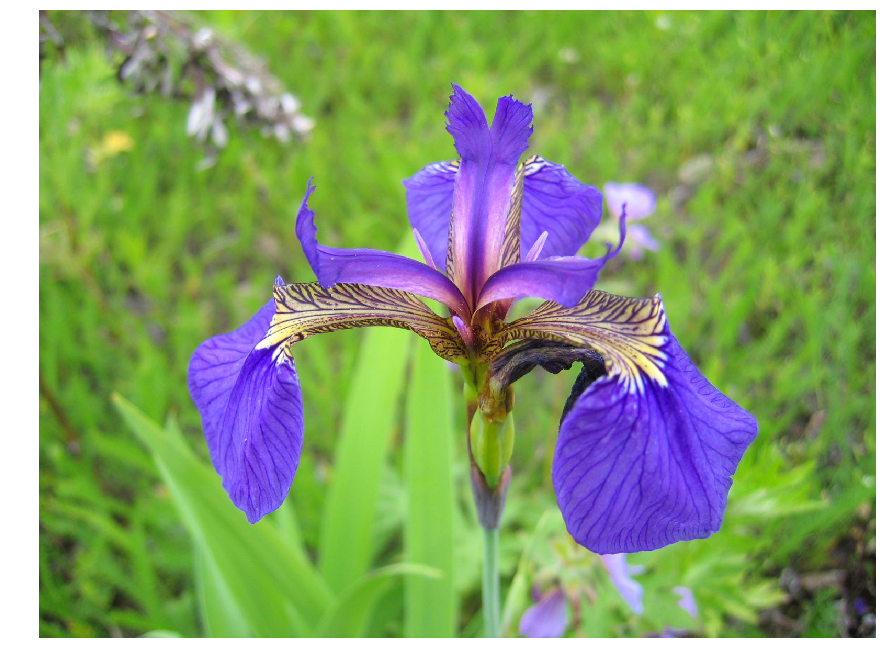

In [2]:
photo_Irissetosa = imageio.imread('/Users/meganporter/OwnJupyterNotebooks/Irissetosa1.jpg')
plt.figure(figsize=(15,15))
plt.axis('off')
plt.imshow(photo_Irissetosa)

#### *Iris virginica*

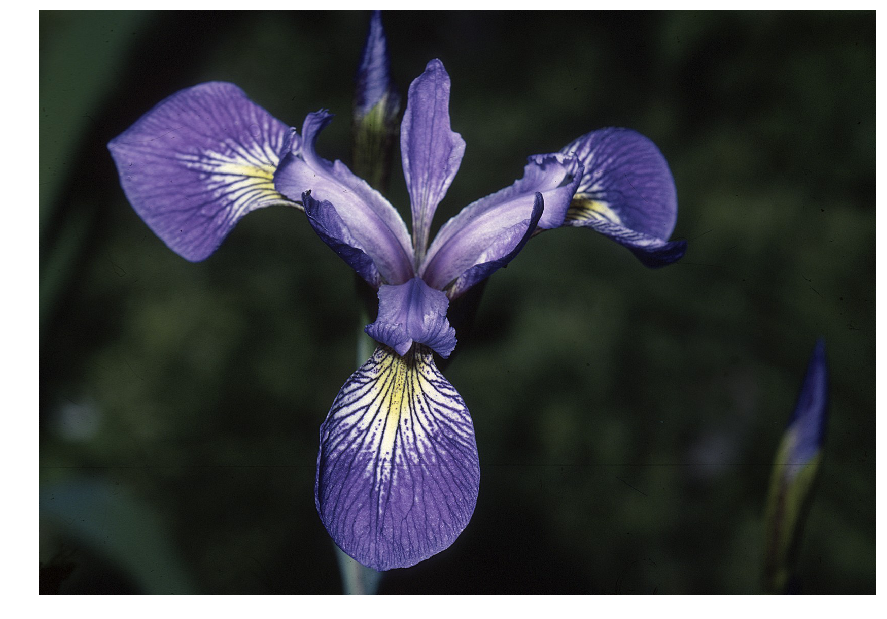

In [3]:
photo_Irisvirginica = imageio.imread('/Users/meganporter/OwnJupyterNotebooks/Irisvirginica.jpg')
plt.figure(figsize=(15,15))
plt.axis('off')
plt.imshow(photo_Irisvirginica)

#### *Iris versicolor*

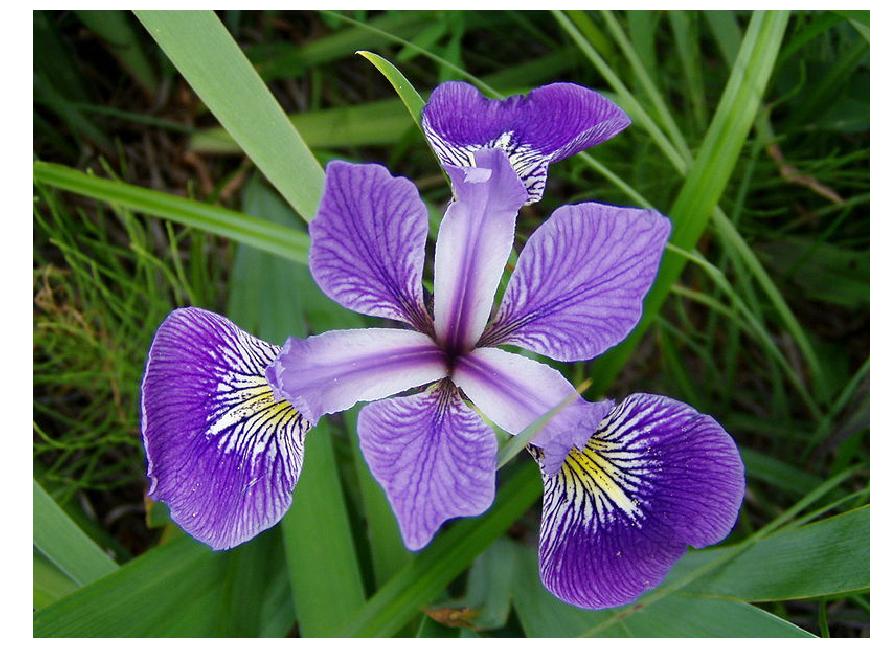

In [5]:
photo_Irisversicolor = imageio.imread('/Users/meganporter/OwnJupyterNotebooks/Irisversicolor2.jpg')
plt.figure(figsize=(15,15))
plt.axis('off')
plt.imshow(photo_Irisversicolor)

## Some Botany and Ecology...

*Iris setosa* 
syn. *I. arctica* <br />
**Common Names:** Beachhead Iris, Beach-head Iris, Alaska Iris, Wild Flag Iris <br />
**Range:** British Columbia, north arount the arctic and west as far as Japan, China, Korea, and Russia, as far east as Quebec and Maine. <br />
**Conditions** Sunny locations, wet to moist soils, in marshes areas in wetlands or riverine or lacustrine shorelines.  Can also be found in meadow habitats. Also tolerant of droughty conditions so will grow in gravelly and sandy soils near beaches.<br />
**Flowers:** Flower color can vary from blue to violet to lavender to purple-blue and violet-blue.<br />
**Notable Characteristics:** Leaves grow from bases of plants and can be tinted purple at this location but have a bluish tint at far ends.<br />
**Additional:** Attracts hummingbirds.<br />
<br />
*Iris virginica*
syn. *I. caroliniana*<br />
**Common Names:** Virginia iris, Great blue flag, Southern blue flag, Iris de Virginie<br />
**Range:** Coastal flatlands of Georgia and Florida <br />
**Conditions:** Wetlands, marshes.<br />
**Flowers:** Flower color can range from dark-violet to pink-tinged white.<br />
**Notable Characteristics** Leaves are sometimes longer than the flower stalks. <br />
<br />
*Iris versicolor* <br />
**Common Names:** Harlequin blueflag, Northern blue flag, Large blue iris <br />
**Range:** Northeastern North America and, randomly, Idaho. <br />
**Conditions** Wetlands, marshes, wet roadsides. <br />
**Flowers:** Light and dark blue to purple and violet. <br />
**Notable Characteristics:** Sepals have a green-yellow patch at the base.

<br />
https://en.wikipedia.org/wiki/Iris_setosa, http://www.efloras.org/florataxon.aspx?flora_id=1&taxon_id=200028212, https://www.wildflower.org/plants/result.php?id_plant=irse, https://www.wildflower.org/plants/result.php?id_plant=IRVI, http://www.efloras.org/florataxon.aspx?flora_id=1&taxon_id=242101722, https://en.wikipedia.org/wiki/Iris_virginica, https://www.wildflower.org/plants/result.php?id_plant=IRVE2, http://www.efloras.org/florataxon.aspx?flora_id=1&taxon_id=200028227, https://en.wikipedia.org/wiki/Iris_versicolor, https://plants.usda.gov/core/profile?symbol=irve2

In [49]:
iris_data = pd.read_csv('/Users/meganporter/OwnJupyterNotebooks/Iris.csv')

In [50]:
iris_data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [51]:
iris_data.shape

(150, 6)

In [61]:
iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
Id               150 non-null int64
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.1+ KB


In [52]:
iris_data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [53]:
iris_data.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [54]:
type(iris_data)

pandas.core.frame.DataFrame

In [55]:
iris_data.shape

(150, 6)

In [56]:
iris_data["Species"].value_counts()

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        50
Name: Species, dtype: int64

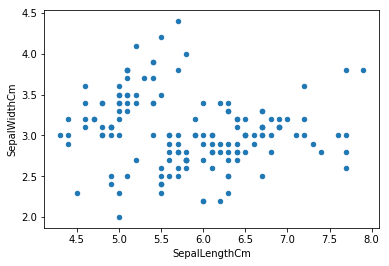

In [69]:
# Create a scatterplot based on sepal data
iris_data.plot(kind="scatter", x="SepalLengthCm", y="SepalWidthCm")
plt.show()

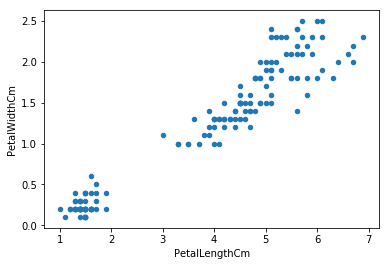

In [70]:
# Create a scatterplot based on petal data
iris_data.plot(kind="scatter", x="PetalLengthCm", y="PetalWidthCm")
plt.show()

Text(0.5,1,'Iris species and Sepal Characteristics')

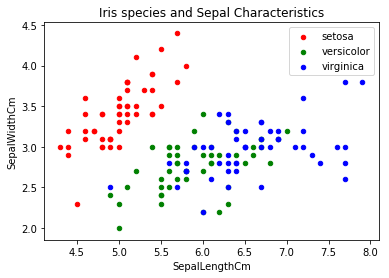

In [71]:
# Create a new scatterplot that is color-coded
ax = iris_data[iris_data.Species=='Iris-setosa'].plot.scatter(x='SepalLengthCm', y='SepalWidthCm', 
                                                    color='red', label='setosa')
iris_data[iris_data.Species=='Iris-versicolor'].plot.scatter(x='SepalLengthCm', y='SepalWidthCm', 
                                                color='green', label='versicolor', ax=ax)
iris_data[iris_data.Species=='Iris-virginica'].plot.scatter(x='SepalLengthCm', y='SepalWidthCm', 
                                                color='blue', label='virginica', ax=ax)
ax.set_title("Iris species and Sepal Characteristics")

### Basic Data

In [9]:
setosa = iris_data['Species'].str.contains('setosa')
I_setosa = iris_data[setosa]
I_setosa.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [10]:
I_setosa.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,50.00000,50.00000,50.000000,50.000000,50.00000
mean,25.50000,5.00600,3.418000,1.464000,0.24400
std,14.57738,0.35249,0.381024,0.173511,0.10721
min,1.00000,4.30000,2.300000,1.000000,0.10000
25%,13.25000,4.80000,3.125000,1.400000,0.20000
50%,25.50000,5.00000,3.400000,1.500000,0.20000
75%,37.75000,5.20000,3.675000,1.575000,0.30000
max,50.00000,5.80000,4.400000,1.900000,0.60000


In [11]:
del I_setosa['Id']

In [12]:
I_setosa.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


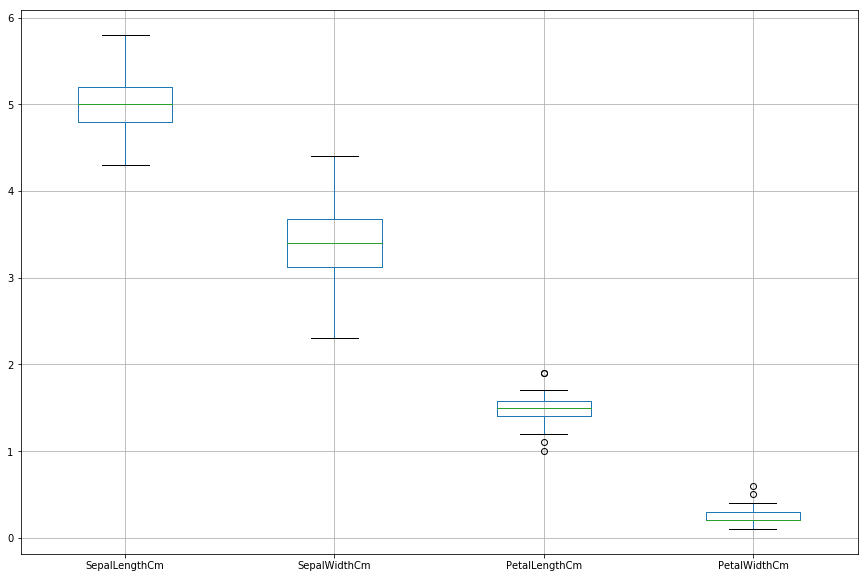

In [13]:
I_setosa.boxplot(figsize = (15,10))

In [14]:
virginica = iris_data['Species'].str.contains('virginica')
I_virginica = iris_data[virginica]
I_virginica.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
100,101,6.3,3.3,6.0,2.5,Iris-virginica
101,102,5.8,2.7,5.1,1.9,Iris-virginica
102,103,7.1,3.0,5.9,2.1,Iris-virginica
103,104,6.3,2.9,5.6,1.8,Iris-virginica
104,105,6.5,3.0,5.8,2.2,Iris-virginica


In [15]:
I_virginica.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,50.00000,50.00000,50.000000,50.000000,50.00000
mean,125.50000,6.58800,2.974000,5.552000,2.02600
std,14.57738,0.63588,0.322497,0.551895,0.27465
min,101.00000,4.90000,2.200000,4.500000,1.40000
25%,113.25000,6.22500,2.800000,5.100000,1.80000
50%,125.50000,6.50000,3.000000,5.550000,2.00000
75%,137.75000,6.90000,3.175000,5.875000,2.30000
max,150.00000,7.90000,3.800000,6.900000,2.50000


In [16]:
del I_virginica['Id']

In [17]:
I_virginica.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
100,6.3,3.3,6.0,2.5,Iris-virginica
101,5.8,2.7,5.1,1.9,Iris-virginica
102,7.1,3.0,5.9,2.1,Iris-virginica
103,6.3,2.9,5.6,1.8,Iris-virginica
104,6.5,3.0,5.8,2.2,Iris-virginica


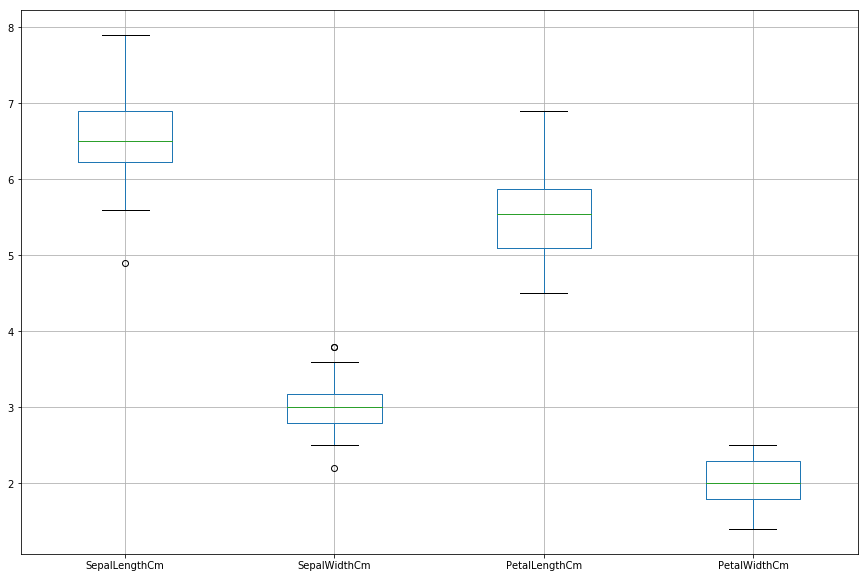

In [18]:
I_virginica.boxplot(figsize = (15,10))

In [19]:
versicolor = iris_data['Species'].str.contains('versicolor')
I_versicolor = iris_data[versicolor]
I_versicolor.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
50,51,7.0,3.2,4.7,1.4,Iris-versicolor
51,52,6.4,3.2,4.5,1.5,Iris-versicolor
52,53,6.9,3.1,4.9,1.5,Iris-versicolor
53,54,5.5,2.3,4.0,1.3,Iris-versicolor
54,55,6.5,2.8,4.6,1.5,Iris-versicolor


In [20]:
I_versicolor.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,50.00000,50.000000,50.000000,50.000000,50.000000
mean,75.50000,5.936000,2.770000,4.260000,1.326000
std,14.57738,0.516171,0.313798,0.469911,0.197753
min,51.00000,4.900000,2.000000,3.000000,1.000000
25%,63.25000,5.600000,2.525000,4.000000,1.200000
50%,75.50000,5.900000,2.800000,4.350000,1.300000
75%,87.75000,6.300000,3.000000,4.600000,1.500000
max,100.00000,7.000000,3.400000,5.100000,1.800000


In [21]:
del I_versicolor['Id']

In [22]:
I_versicolor.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
50,7.0,3.2,4.7,1.4,Iris-versicolor
51,6.4,3.2,4.5,1.5,Iris-versicolor
52,6.9,3.1,4.9,1.5,Iris-versicolor
53,5.5,2.3,4.0,1.3,Iris-versicolor
54,6.5,2.8,4.6,1.5,Iris-versicolor


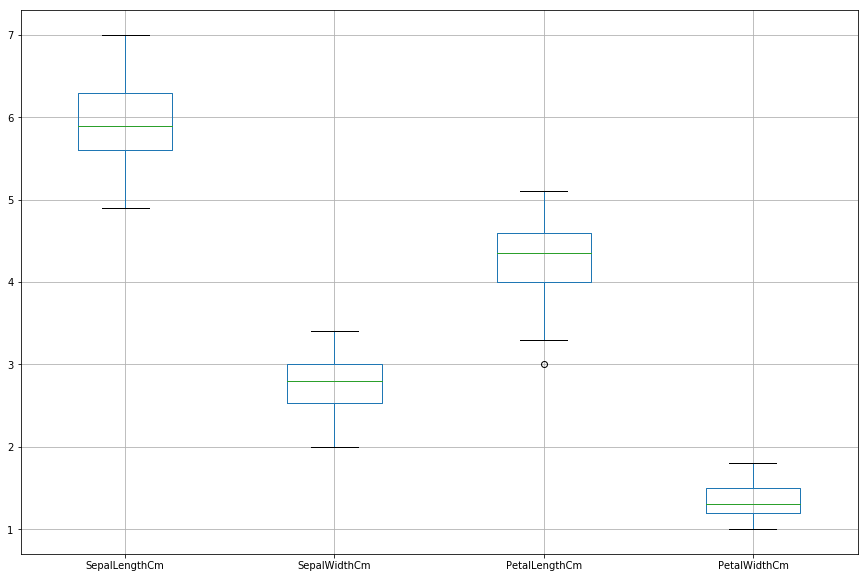

In [23]:
I_versicolor.boxplot(figsize = (15,10))

## Machine Learning Prediction

In [30]:
iris_input = iris_data[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]
iris_input.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [31]:
iris_input.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'], dtype='object')

In [26]:
X = StandardScaler().fit_transform(notable)
X

array([[-9.00681170e-01,  1.03205722e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00, -1.24957601e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.38535265e+00,  3.37848329e-01, -1.39813811e+00,
        -1.31297673e+00],
       [-1.50652052e+00,  1.06445364e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.02184904e+00,  1.26346019e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-5.37177559e-01,  1.95766909e+00, -1.17067529e+00,
        -1.05003079e+00],
       [-1.50652052e+00,  8.00654259e-01, -1.34127240e+00,
        -1.18150376e+00],
       [-1.02184904e+00,  8.00654259e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.74885626e+00, -3.56360566e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00,  1.06445364e-01, -1.28440670e+00,
        -1.44444970e+00],
       [-5.37177559e-01,  1.49486315e+00, -1.28440670e+00,
        -1.31297673e+00],
       [-1.26418478e+00,  8.00654259e-01, -1.22754100e+00,
      

In [27]:
kmeans = KMeans(n_clusters=3)
model = kmeans.fit(X)
print("model:\n",model)

model:
 KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)


In [34]:
labels = kmeans.predict(X)
labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

In [35]:
centroids = model.cluster_centers_
centroids

array([[-0.05021989, -0.88029181,  0.34753171,  0.28206327],
       [-1.01457897,  0.84230679, -1.30487835, -1.25512862],
       [ 1.13597027,  0.09659843,  0.996271  ,  1.01717187]])

#### Since there are 50 data points for each species, this model was slightly off :

In [48]:
x = np.array([labels])
unique, counts = np.unique(x, return_counts=True)

print(unique, counts)

[0 1 2] [53 50 47]


##### Code for how to create graphs taken or adapted from the following:
https://www.kaggle.com/xuhewen/iris-dataset-visualization-and-machine-learning
https://mubaris.com/2017/10/01/kmeans-clustering-in-python/